In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [61]:
X, Y = np.mgrid[0:5, 0:5]

def grid2enclosure(X, Y):
    """Generate cell boundaries """
    # compute gradients in X and Y
    Xx, Xy = np.gradient(X)
    Yx, Yy = np.gradient(Y)

    # lower left
    ll = np.c_[(X - 0.5*Xx + 0.5*Yx).ravel(), (Y - 0.5*Yy + 0.5*Xy).ravel()]
    # lower right
    lr = np.c_[(X + 0.5*Xx + 0.5*Yx).ravel(), (Y - 0.5*Yy - 0.5*Xy).ravel()]
    # upper left
    ul = np.c_[(X - 0.5*Xx - 0.5*Yx).ravel(), (Y + 0.5*Yy + 0.5*Xy).ravel()]
    # upper right
    ur = np.c_[(X + 0.5*Xx - 0.5*Yx).ravel(), (Y + 0.5*Yy - 0.5*Xy).ravel()]

    # number of cells x 5 points/cell x 2 (x,y)
    verts = np.hstack(
        [
            ll[:,np.newaxis,:], 
            lr[:,np.newaxis,:], 
            ur[:,np.newaxis,:], 
            ul[:,np.newaxis,:],
            ll[:,np.newaxis,:] 

        ]
    )
    return verts
verts = grid2verts(X, Y)


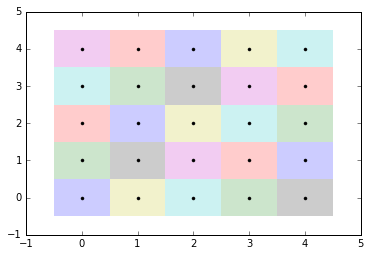

In [62]:
plt.plot(X.ravel(), Y.ravel(), 'k.')
for vert in verts:
    plt.fill(vert[:,0], vert[:,1], edgecolor='none', alpha=0.2)

In [63]:
import matplotlib.transforms

In [64]:
T = matplotlib.transforms.Affine2D()
T.rotate_around(1, 1, 0.1 * np.pi)
T.skew(0.8, 0.3)
XY_t = T.transform(np.c_[X.ravel(), Y.ravel()])
XY_t.shape
X_t, Y_t = XY_t[:,0].reshape(X.shape), XY_t[:,1].reshape(Y.shape)

vert_t = [T.transform(vert) for vert in verts]
vert_t = grid2verts(X_t, Y_t)

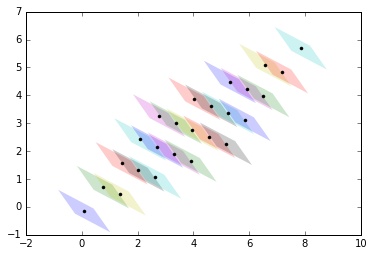

In [65]:
plt.plot(X_t, Y_t, 'k.')
for vert in vert_t:
    plt.fill(vert[:,0], vert[:,1], edgecolor='none', alpha=0.2)